<a href="https://colab.research.google.com/github/Thierrykev/personnal_projects/blob/main/prediction_prices_ticktes_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction prices of airlines ticktes 

Import of modules 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
data=pd.read_excel('Data_Train.xlsx')

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.shape

(10683, 11)

In [ ]:
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


removal of missing balues 

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
def datetime(col):
    data[col]=pd.to_datetime(data[col])
    

In [ ]:
features=['Date_of_Journey','Dep_Time','Arrival_Time']

In [ ]:
for feature in features:
  datetime(feature)

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [ ]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [ ]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-11-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-19 05:50:00,2022-11-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
data.shape

(10682, 14)

data cleaning and feature engineering 

In [ ]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-11-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-19 05:50:00,2022-11-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
def extract_hour_min(df,col):
    df[col+'hour']=df[col].dt.hour
    df[col+'minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [ ]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,Dep_Timehour,Dep_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-11-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [ ]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


Data analysis 


In [ ]:
def flight_dep_time(x):
  if (x>4) and (x<=8):
    return'Early morng'
  elif (x>8) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=16):
    return 'Afternoon'
  elif (x>16) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else:
      return 'Late' 

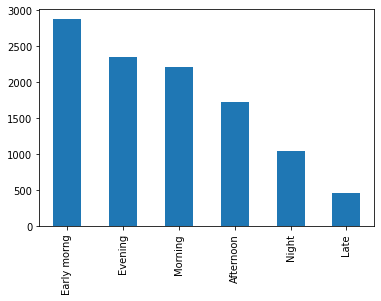

In [ ]:
data['Dep_Timehour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly
import cufflinks as cf 
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [ ]:
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import chart_studio.plotly as py

pre-process Duration and extract meaningful features from it 

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x='0h'+x
  elif 'm' not in x :
    x=x+'0m'
  return x 

In [ ]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [ ]:
int(data['Duration'][0].split()[0][0:-1])

2

In [ ]:
int(data['Duration'][0].split()[1][0:-1])

50

In [ ]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(data['Duration'][0].split()[0][0:-1]))


In [ ]:
data['Duration_minutes']=data['Duration'].apply(lambda x:int(data['Duration'][1].split()[0][0:-1]))



In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,7
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,2,7


 

*  Lets Analyse wether the duration impact

*  on price or not 
which city has the most final destination of flights  
  





In [ ]:
data['Duration_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,7,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,2,7,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,9,6,2019,9,25,4,25,2,7,11400
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,2,7,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,2,7,285


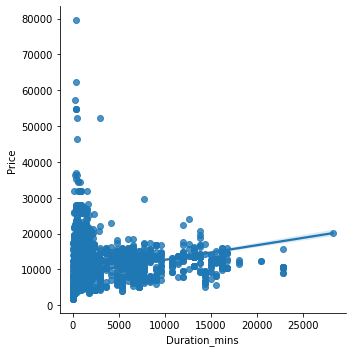

In [ ]:
sns.lmplot(x='Duration_mins',y='Price',data=data)

In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

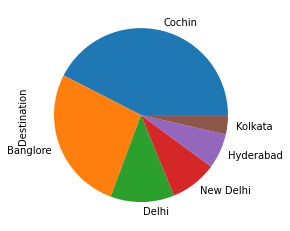

In [ ]:
data['Destination'].value_counts().plot(kind='pie')

In [ ]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [ ]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

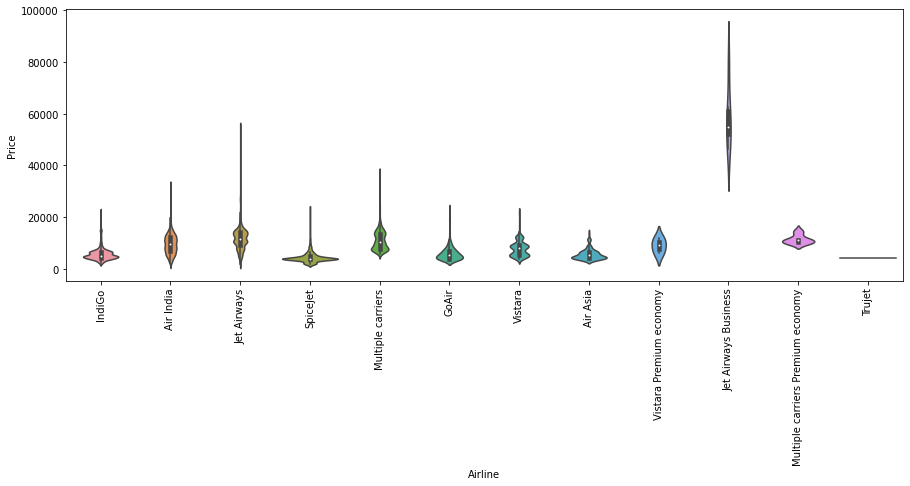

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')


Applying one hot encoding on data 


In [ ]:
a=data['Additional_Info'].value_counts()
np.round(a/(a.sum())*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [ ]:
data.drop(columns=['Additional_Info','Route','Duration_mins','journey_year'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_month', 'journey_day', 'Dep_Timehour', 'Dep_Timeminute',
       'Arrival_Timehour', 'Arrival_Timeminute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

Feature encoding 

In [ ]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [ ]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [ ]:
 data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [ ]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0 )

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [ ]:
data['Source']=='Banglore'

0         True
1        False
2        False
3        False
4         True
         ...  
10678    False
10679    False
10680     True
10681     True
10682    False
Name: Source, Length: 10682, dtype: bool

In [ ]:
for category in data['Source'].unique():
  data['Source_' + category]=data['Source'].apply(lambda x: 1 if x=='Banglore' else 0 )

In [ ]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,7,1,1,1,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,2,7,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h0m,2 stops,13882,9,6,9,25,4,25,2,7,0,0,0,0,0


In [ ]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines 

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict1={key:index for index,key in enumerate(airlines)}

In [ ]:
data['Airline']=data['Airline'].map(dict1)

encoding destination

In [ ]:
Destinations=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
Destinations 

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [ ]:
dict2={key:index for index,key in enumerate(Destinations)}

In [ ]:
data['Destination']=data['Destination'].map(dict2)

In [ ]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,2h 50m,non-stop,3897,3,24,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,2,7,0,0,0,0,0


encoding Total_Stops 

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stops={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':4, '4 stops':5}

In [ ]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [ ]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,5,2h 50m,0,3897,3,24,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,3,7h 25m,1,7662,1,5,5,50,13,15,2,7,0,0,0,0,0
2,10,Delhi,4,19h0m,1,13882,9,6,9,25,4,25,2,7,0,0,0,0,0


removing outliers

In [ ]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.displot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.displot(df[col],ax=ax3,Kde=False)

In [ ]:
np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

removing features that is not important 

In [ ]:
data.dtypes

Airline                int64
Source                object
Destination            int64
Duration              object
Total_Stops            int64
Price                  int64
journey_month          int64
journey_day            int64
Dep_Timehour           int64
Dep_Timeminute         int64
Arrival_Timehour       int64
Arrival_Timeminute     int64
Duration_hours         int64
Duration_minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [ ]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [ ]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,5,0,3897,3,24,22,20,1,10,2,7,1,1,1,1,1
1,7,3,1,7662,1,5,5,50,13,15,2,7,0,0,0,0,0


In [ ]:
data.shape

(10682, 17)

In [ ]:
data.dtypes

Airline               int64
Destination           int64
Total_Stops           int64
Price                 int64
journey_month         int64
journey_day           int64
Dep_Timehour          int64
Dep_Timeminute        int64
Arrival_Timehour      int64
Arrival_Timeminute    int64
Duration_hours        int64
Duration_minutes      int64
Source_Banglore       int64
Source_Kolkata        int64
Source_Delhi          int64
Source_Chennai        int64
Source_Mumbai         int64
dtype: object

#Lets perform feature selection 

In [ ]:
#Lets perform feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
X=data.drop(['Price'],axis=1)
Y=data['Price']

In [ ]:
mutual_info_regression(X,Y)

array([0.97133644, 1.11637264, 0.78724067, 0.25097939, 0.20696962,
       0.33865242, 0.25548728, 0.40050213, 0.35079881, 0.00863427,
       0.        , 0.39049829, 0.38526504, 0.39458545, 0.3919748 ,
       0.3926312 ])

In [ ]:
imp=pd.DataFrame(mutual_info_regression(X,Y),index=X.columns)
imp.columns=['importance']


In [ ]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.110835
Airline,0.976713
Total_Stops,0.783565
Arrival_Timehour,0.404847
Source_Mumbai,0.397362
Source_Delhi,0.392891
Source_Chennai,0.391556
Source_Banglore,0.389248
Source_Kolkata,0.387474
Arrival_Timeminute,0.347585


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rg=RandomForestRegressor()
model=Rg.fit(X_train,Y_train)

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
Y_pred

array([16786.45,  6226.13,  8938.05, ...,  3471.01,  6246.7 ,  6825.96])

In [ ]:
Y_test

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
3022    13555
8416    12760
2605     3419
1392     5797
8535     6818
Name: Price, Length: 2671, dtype: int64

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.8338427597157627

In [ ]:
from sklearn.metrics import *

In [ ]:
err=Y_test-Y_pred
err

6075    -131.4500
3544   -1267.1300
9291     248.9500
5032      83.6800
2483   -2126.5465
          ...    
3022    1684.2000
8416   -6526.3200
2605     -52.0100
1392    -449.7000
8535      -7.9600
Name: Price, Length: 2671, dtype: float64

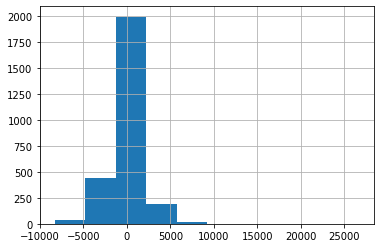

In [ ]:
err.hist()